# Arboles de Rgresion 

`dataset: salrios_posicion.csv`

In [1]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Cargar datos
dataset = pd.read_csv('./salarios_posicion.csv', sep=';')
print(dataset.shape)
dataset.head(10)

(10, 3)


,Posición,Nivel,Salario
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:,2].values

In [4]:
from sklearn.tree import DecisionTreeRegressor
regresion = DecisionTreeRegressor(random_state=0)
regresion.fit(x,y)
y_pred = regresion.predict([[6.5],[2.5],[8.3]])
print("Para un nivel de 6.5, el salario es de: $", y_pred)

Para un nivel de 6.5, el salario es de: $ [150000.  50000. 300000.]


In [5]:
score = regresion.score(x,y) #modelo sobreajustado
score*100

100.0

# Predecir el valor de una vivienda en BOSTON

In [6]:
dt = pd.read_csv('./boston_housing.csv', delimiter='\s+', header=None)
dt.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dt.head()


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dev\AppData\Local\Temp\ipykernel_2312\3501219486.py:1: SyntaxWarning: invalid escape sequence '\s'
  dt = pd.read_csv('./boston_housing.csv', delimiter='\s+', header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Graficamos valores atipicos

In [10]:
#!pip install seaborn
import seaborn as sns


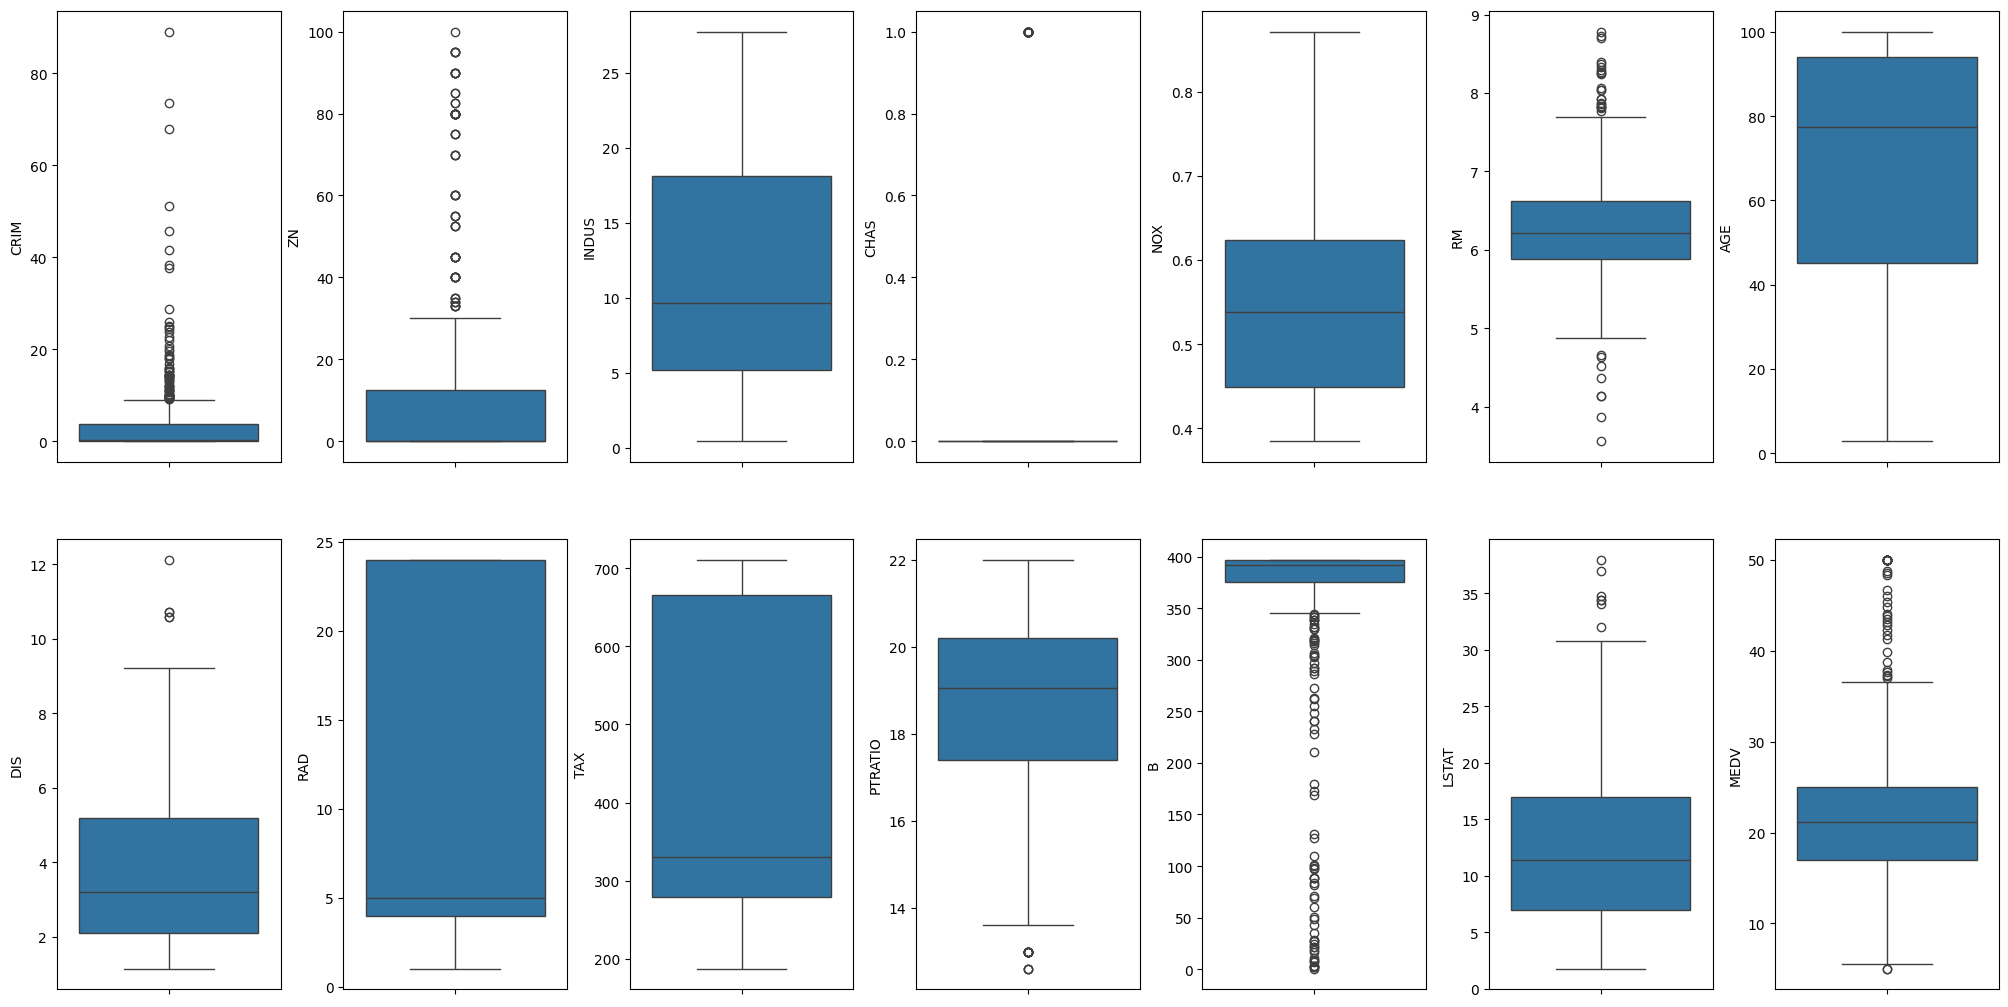

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dt.items():
    sns.boxplot(y=k, data=dt, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

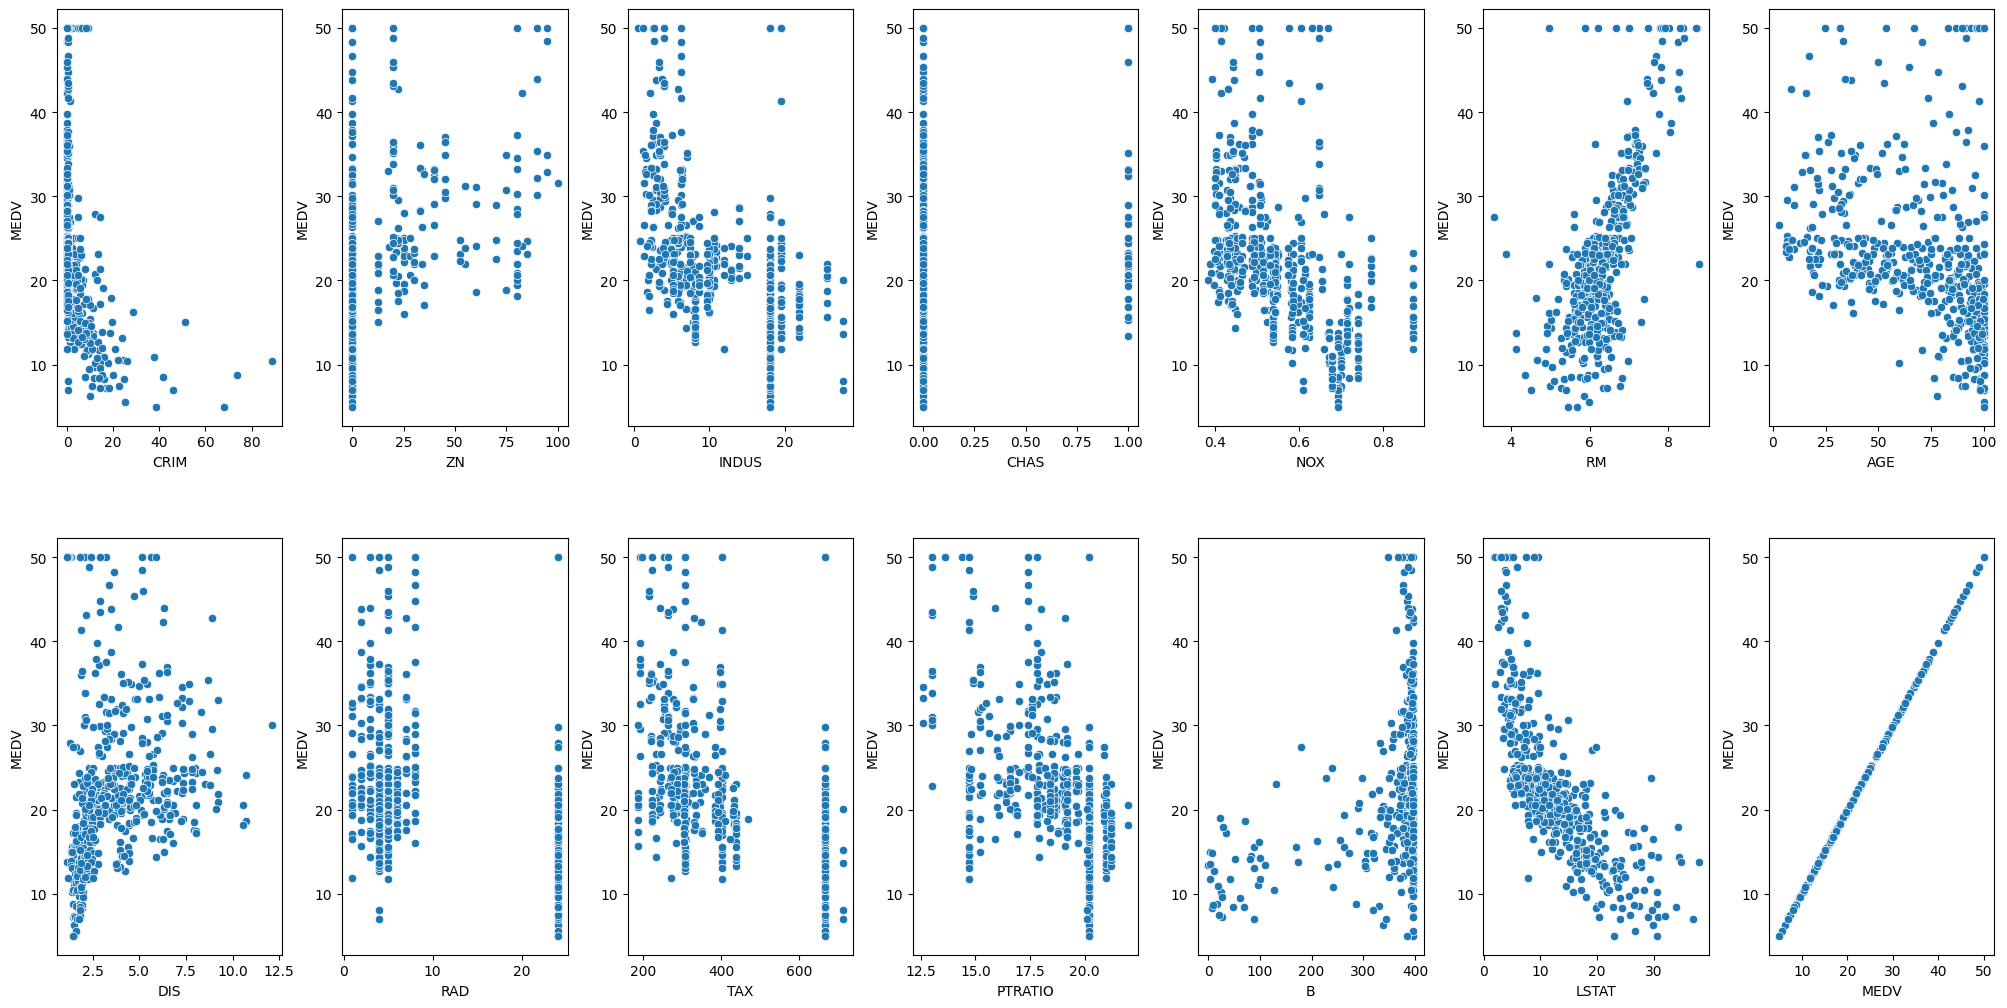

In [ ]:
# Graficos de dispersion
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dt.items():
    sns.scatterplot(y=k, x='MEDV', data=dt, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [29]:

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(
    dt.drop(columns=['MEDV']),
    dt["MEDV"],
    test_size=0.25,
    random_state=123)

modelo = DecisionTreeRegressor(max_depth=5,random_state=123)
modelo.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [30]:
modelo.score(x_test, y_test)


0.5378009147680207

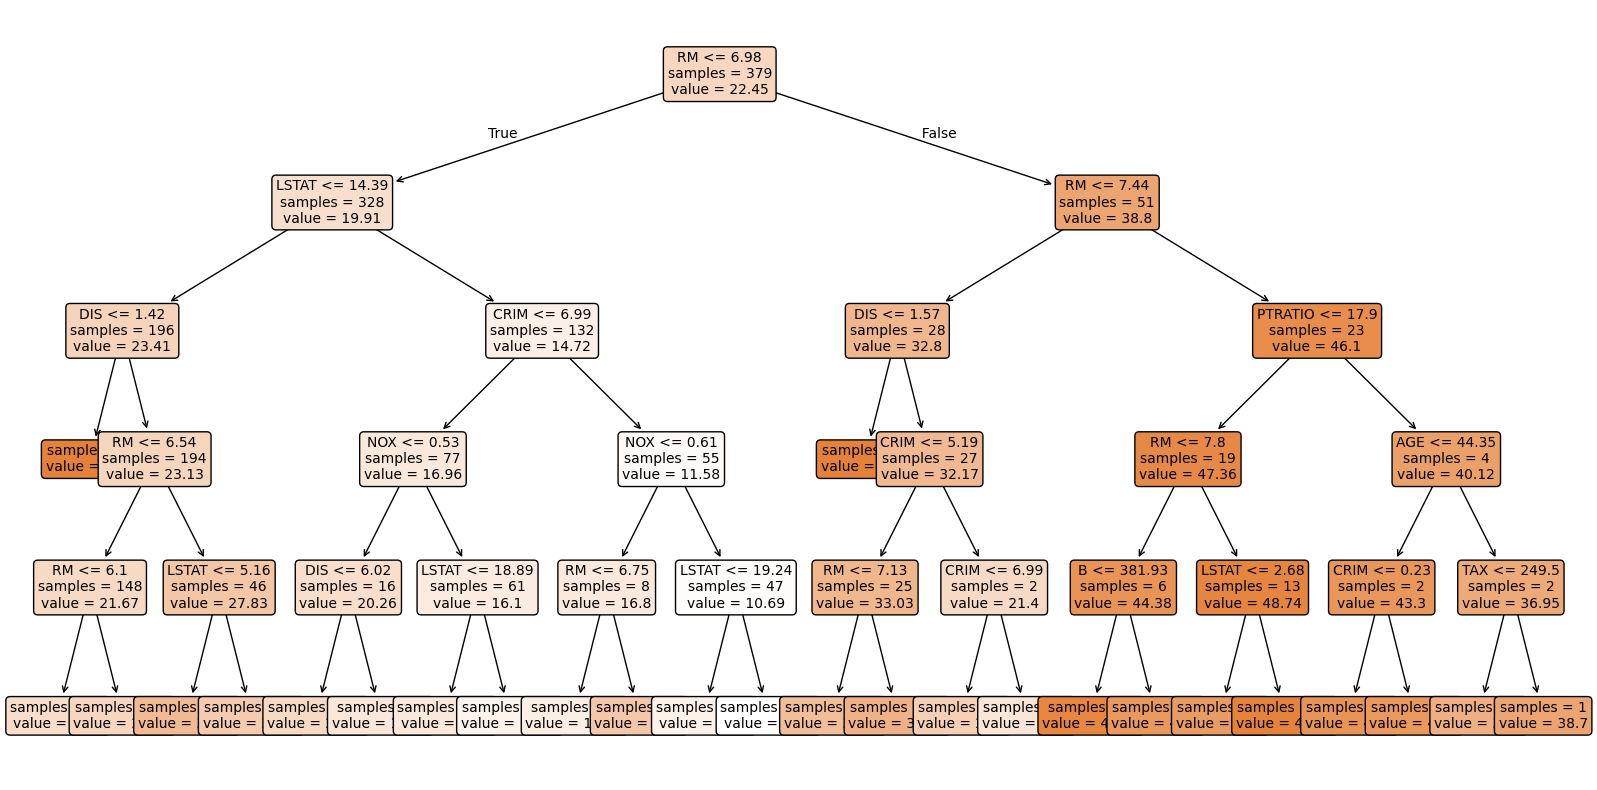

In [32]:
# Graficamos el modelo 
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
arbol = plot_tree(
    modelo,
    feature_names=dt.drop(columns=['MEDV']).columns,
    filled=True,
    rounded=True,
    impurity=False,
    fontsize=10,
    precision=2,
)